In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [316]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [317]:
%matplotlib inline

In [318]:
covid_ng = pd.read_excel('data/records_covid19.xlsx', parse_dates=['Dates'],sheet_name='experimentation')
deathby_state = pd.read_csv('data/cases30052020.csv')

In [319]:
pd.set_option('display.max_columns', 60)

In [320]:
covid_ng.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [321]:
covid_ng.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
95,2020-05-25 15:34:33,90,14,23,9,2,3,27,5,0,4,0,0,0,0,0,0,7,5,0,0,0,0,0,0,0,1,0,12,26,0,0,0,0,0,1,0,0,48,7
96,2020-05-26 15:30:43,161,0,4,1,0,2,0,1,27,6,0,0,1,19,0,1,3,36,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,0,0,3,0,74,16
97,2020-05-27 15:44:12,256,0,13,1,0,2,23,1,22,2,6,11,0,7,0,0,2,14,0,0,2,2,0,0,2,1,11,2,1,0,2,6,0,0,0,0,0,116,5
98,2020-05-28 15:27:18,111,16,3,4,0,2,0,1,0,8,2,10,1,6,0,0,6,5,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,4,0,91,5
99,2020-05-29 15:46:01,254,29,3,0,0,2,0,6,22,15,0,0,2,11,0,1,0,14,24,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,105,2


In [322]:
covid_ng.shape

(100, 40)

In [323]:
covid_ng.columns

Index(['Dates', 'Lagos', 'Abuja(FCT)', 'Kano', 'Ogun', 'Osun', 'Gombe',
       'Katsina', 'Borno', 'Edo', 'Oyo', 'Kwara', 'Akwa Ibom', 'Bauchi',
       'Kaduna', 'Ekiti', 'Ondo', 'Delta', 'Rivers', 'Jigawa', 'Enugu',
       'Niger', 'Abia', 'Zamfara', 'Sokoto', 'Benue', 'Anambra', 'Adamawa',
       'Plateau', 'Imo', 'Kebbi', 'Kogi', 'Nasarawa', 'Taraba', 'Yobe',
       'Bayelsa', 'Ebonyi', 'Cross River', 'Dischared/Revovered', 'Dealth'],
      dtype='object')

In [324]:
exp_wip = covid_ng.copy()

In [325]:
exp_wip.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
#Extract geopolitical zone
exp_wip['South_West'] = exp_wip['Lagos'] + exp_wip['Ondo'] + exp_wip['Osun'] + exp_wip['Oyo'] + \
exp_wip['Ekiti'] + exp_wip['Ogun']

exp_wip['South_South'] = exp_wip['Edo'] + exp_wip['Rivers'] + exp_wip['Delta'] + exp_wip['Cross River'] + \
exp_wip['Bayelsa'] + exp_wip['Akwa Ibom']

exp_wip['South_East'] = exp_wip['Anambra'] + exp_wip['Imo'] + exp_wip['Enugu'] + exp_wip['Abia'] + \
exp_wip['Ebonyi']

exp_wip['North_Central'] = exp_wip['Benue'] + exp_wip['Kogi'] + exp_wip['Nasarawa'] + exp_wip['Niger'] + \
exp_wip['Plateau'] + exp_wip['Kwara']

exp_wip['North_East'] = exp_wip['Adamawa'] + exp_wip['Bauchi'] + exp_wip['Borno'] + exp_wip['Gombe'] + \
exp_wip['Taraba'] + exp_wip['Yobe']

exp_wip['North_West'] = exp_wip['Jigawa'] + exp_wip['Kaduna'] + exp_wip['Kano'] + exp_wip['Katsina'] + \
exp_wip['Kebbi'] + exp_wip['Sokoto'] + exp_wip['Zamfara']


In [327]:
exp_wip.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth,South_West,South_South,South_East,North_Central,North_East,North_West
95,2020-05-25 15:34:33,90,14,23,9,2,3,27,5,0,4,0,0,0,0,0,0,7,5,0,0,0,0,0,0,0,1,0,12,26,0,0,0,0,0,1,0,0,48,7,105,13,27,12,8,50
96,2020-05-26 15:30:43,161,0,4,1,0,2,0,1,27,6,0,0,1,19,0,1,3,36,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,0,0,3,0,74,16,169,66,4,10,4,23
97,2020-05-27 15:44:12,256,0,13,1,0,2,23,1,22,2,6,11,0,7,0,0,2,14,0,0,2,2,0,0,2,1,11,2,1,0,2,6,0,0,0,0,0,116,5,259,49,4,20,14,43
98,2020-05-28 15:27:18,111,16,3,4,0,2,0,1,0,8,2,10,1,6,0,0,6,5,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,4,0,91,5,123,21,4,4,4,10
99,2020-05-29 15:46:01,254,29,3,0,0,2,0,6,22,15,0,0,2,11,0,1,0,14,24,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,105,2,270,36,0,2,12,38


In [328]:
#format header columns
def clean_col(name):
    return name.strip().lower().replace(" ", "_").replace('/','_')


In [329]:
exp_wip_col_clean = exp_wip.rename(columns=clean_col)

In [330]:
exp_wip_col_clean.head()

,dates,lagos,abuja(fct),kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,dischared_revovered,dealth,south_west,south_south,south_east,north_central,north_east,north_west
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [331]:
exp_wip_col_clean.rename(columns={'abuja(fct)': 'abuja','dealth':'death','dischared_revovered':'discharged_recovered'}, inplace=True)

In [332]:
exp_wip_col_clean.tail()

,dates,lagos,abuja,kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,discharged_recovered,death,south_west,south_south,south_east,north_central,north_east,north_west
95,2020-05-25 15:34:33,90,14,23,9,2,3,27,5,0,4,0,0,0,0,0,0,7,5,0,0,0,0,0,0,0,1,0,12,26,0,0,0,0,0,1,0,0,48,7,105,13,27,12,8,50
96,2020-05-26 15:30:43,161,0,4,1,0,2,0,1,27,6,0,0,1,19,0,1,3,36,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,0,0,3,0,74,16,169,66,4,10,4,23
97,2020-05-27 15:44:12,256,0,13,1,0,2,23,1,22,2,6,11,0,7,0,0,2,14,0,0,2,2,0,0,2,1,11,2,1,0,2,6,0,0,0,0,0,116,5,259,49,4,20,14,43
98,2020-05-28 15:27:18,111,16,3,4,0,2,0,1,0,8,2,10,1,6,0,0,6,5,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,4,0,91,5,123,21,4,4,4,10
99,2020-05-29 15:46:01,254,29,3,0,0,2,0,6,22,15,0,0,2,11,0,1,0,14,24,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,105,2,270,36,0,2,12,38


In [333]:
#extract the total daily cases
exp_wip_col_clean['total_daily_cases'] = exp_wip_col_clean['lagos'] + exp_wip_col_clean['abuja'] + \
exp_wip_col_clean['kano'] + exp_wip_col_clean['ogun'] + exp_wip_col_clean['osun'] + \
exp_wip_col_clean['gombe'] + exp_wip_col_clean['katsina'] + exp_wip_col_clean['borno'] + \
exp_wip_col_clean['edo'] + exp_wip_col_clean['oyo'] + exp_wip_col_clean['kwara'] + \
exp_wip_col_clean['akwa_ibom'] + exp_wip_col_clean['kaduna'] + exp_wip_col_clean['ekiti'] + exp_wip_col_clean['ondo'] + \
exp_wip_col_clean['delta'] + exp_wip_col_clean['rivers'] + exp_wip_col_clean['jigawa'] + exp_wip_col_clean['enugu'] + \
exp_wip_col_clean['niger'] + exp_wip_col_clean['abia'] + exp_wip_col_clean['zamfara'] +  exp_wip_col_clean['sokoto'] + \
exp_wip_col_clean['benue'] + exp_wip_col_clean['anambra'] + exp_wip_col_clean['adamawa'] + exp_wip_col_clean['plateau'] + \
exp_wip_col_clean['imo'] + exp_wip_col_clean['kebbi'] + exp_wip_col_clean['kogi'] + exp_wip_col_clean['nasarawa'] + \
exp_wip_col_clean['taraba'] + exp_wip_col_clean['yobe'] + exp_wip_col_clean['bayelsa'] + exp_wip_col_clean['ebonyi'] + \
exp_wip_col_clean['cross_river'] + exp_wip_col_clean['bauchi']

In [334]:
exp_wip_col_clean['total_daily_cases'].tail()

95    229
96    276
97    389
98    182
99    387
Name: total_daily_cases, dtype: int64

In [335]:
exp_wip_col_clean['death'].tail()

95     7
96    16
97     5
98     5
99     2
Name: death, dtype: int64

In [336]:
exp_wip_col_clean.columns

Index(['dates', 'lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina',
       'borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna',
       'ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia',
       'zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo',
       'kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi',
       'cross_river', 'discharged_recovered', 'death', 'south_west',
       'south_south', 'south_east', 'north_central', 'north_east',
       'north_west', 'total_daily_cases'],
      dtype='object')

In [337]:
# implement tidy data principles; melt individual states into one column:'states' 
#and geopolitical zone into 'zones'
tidy_covid1 = exp_wip_col_clean.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','south_west','south_south', 'south_east', 'north_central','north_east','north_west'], 
                                   value_vars=['lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina','borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna','ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia','zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo','kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi','cross_river'],
                                   var_name='states', value_name='cases_state')

In [338]:
tidy_covid1.head()

,dates,discharged_recovered,death,total_daily_cases,south_west,south_south,south_east,north_central,north_east,north_west,states,cases_state
0,2020-02-27 15:40:38,0,0,1,1,0,0,0,0,0,lagos,1
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,lagos,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,lagos,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,lagos,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,lagos,0


In [339]:
#collapse zones into one column
tidy_covid_all = tidy_covid1.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','states','cases_state'], value_vars=['south_west','south_south', 'south_east', 'north_central','north_east','north_west'],
                                 var_name='geopolitical_zones', value_name='cases_zones')

In [340]:
tidy_covid_all.tail()

,dates,discharged_recovered,death,total_daily_cases,states,cases_state,geopolitical_zones,cases_zones
22195,2020-05-25 15:34:33,48,7,229,cross_river,0,north_west,50
22196,2020-05-26 15:30:43,74,16,276,cross_river,0,north_west,23
22197,2020-05-27 15:44:12,116,5,389,cross_river,0,north_west,43
22198,2020-05-28 15:27:18,91,5,182,cross_river,0,north_west,10
22199,2020-05-29 15:46:01,105,2,387,cross_river,0,north_west,38


###  Average Daily Cases By Geopolitical Zone

In [341]:
tidy_covid_all['geopolitical_zones'].unique()

array(['south_west', 'south_south', 'south_east', 'north_central',
       'north_east', 'north_west'], dtype=object)

In [342]:
average_zones_cases = tidy_covid_all.groupby('geopolitical_zones').agg({'cases_zones':'mean'}).reset_index()

In [343]:
average_zones_cases

,geopolitical_zones,cases_zones
0,north_central,2.94
1,north_east,7.61
2,north_west,20.24
3,south_east,1.13
4,south_south,5.67
5,south_west,49.86


In [344]:
sns.set(style='whitegrid')

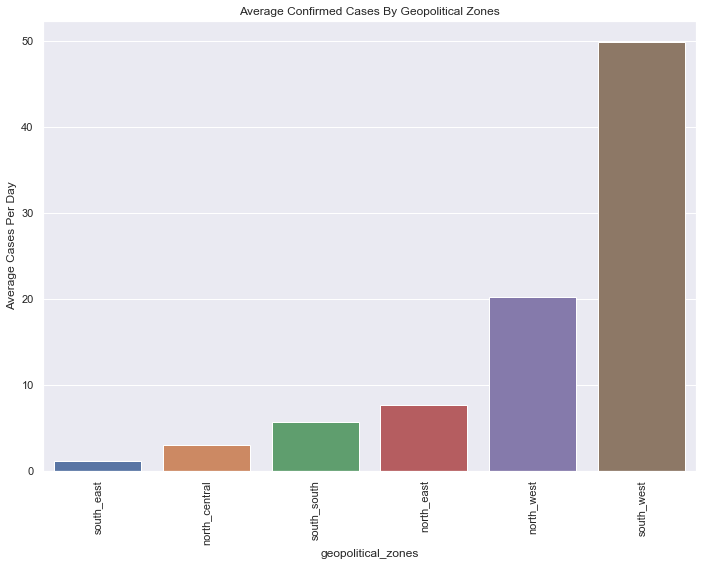

In [345]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='geopolitical_zones', y='cases_zones', data=average_zones_cases, order=['south_east','north_central','south_south','north_east','north_west','south_west']);
ax.set_title('Average Confirmed Cases By Geopolitical Zones')
ax.set_ylabel('Average Cases Per Day')
plt.xticks(rotation=90)
plt.show()

### Monthly  Case Fatality Rate And Mortality Rate

In [346]:
month_fatality = exp_wip_col_clean[['dates', 'death', 'total_daily_cases', 'discharged_recovered']]

In [347]:
#set dates as index
month_fatality_index = month_fatality.set_index('dates')
month_fatality_index.head()

,death,total_daily_cases,discharged_recovered
dates,,,
2020-02-27 15:40:38,0,1,0
2020-02-28 01:00:36,0,0,0
2020-02-29 02:26:52,0,0,0
2020-03-01 22:44:08,0,0,0
2020-03-02 11:53:02,0,0,0


In [348]:
#group cases into months
month_fatality_index_group = month_fatality_index.resample('M').agg({'death': 'sum', 'total_daily_cases':'sum','discharged_recovered':'sum'}).reset_index()
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered
0,2020-02-29,0,1,0
1,2020-03-31,2,137,9
2,2020-04-30,56,1791,310
3,2020-05-31,203,7380,2378


In [349]:
#case fatality and mortality calculation
month_fatality_index_group['case_fatality'] = month_fatality_index_group['death'] / month_fatality_index_group['total_daily_cases']
month_fatality_index_group['mortality_rate'] = month_fatality_index_group['death']/1000
month_fatality_index_group['month'] = month_fatality_index_group['dates'].dt.month

In [350]:
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered,case_fatality,mortality_rate,month
0,2020-02-29,0,1,0,0.000000,0.000,2
1,2020-03-31,2,137,9,0.014599,0.002,3
2,2020-04-30,56,1791,310,0.031267,0.056,4
3,2020-05-31,203,7380,2378,0.027507,0.203,5


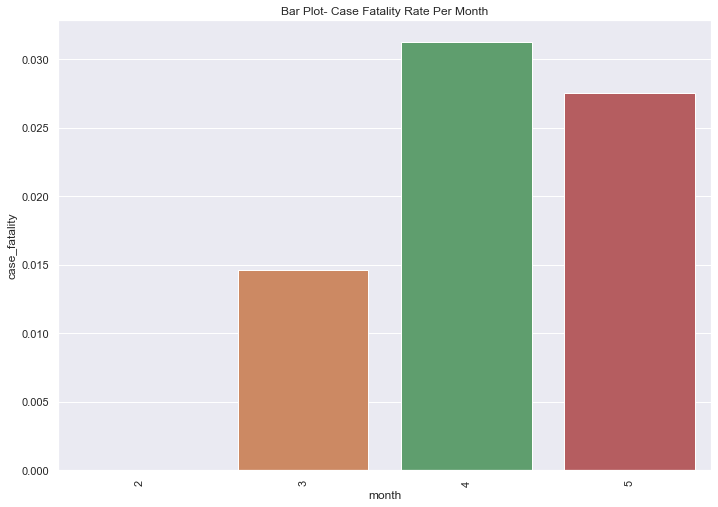

In [351]:
#visualize monthly fatality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='case_fatality', data=month_fatality_index_group)
ax.set_title('Bar Plot- Case Fatality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


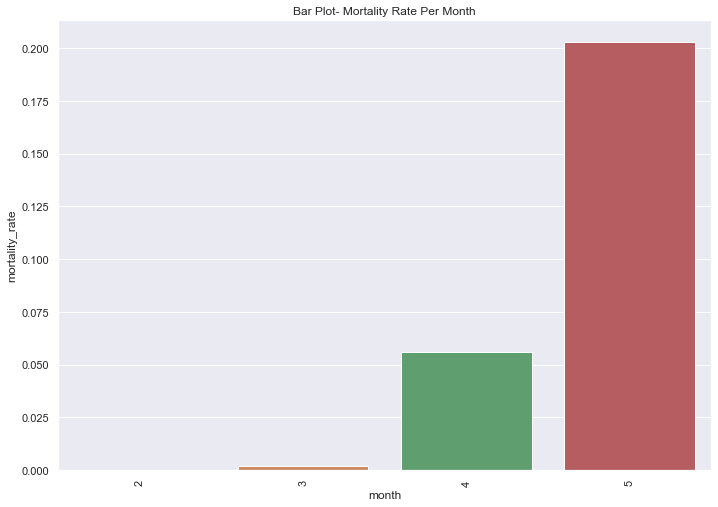

In [352]:
#visualize Mortality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='mortality_rate', data=month_fatality_index_group)
ax.set_title('Bar Plot- Mortality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


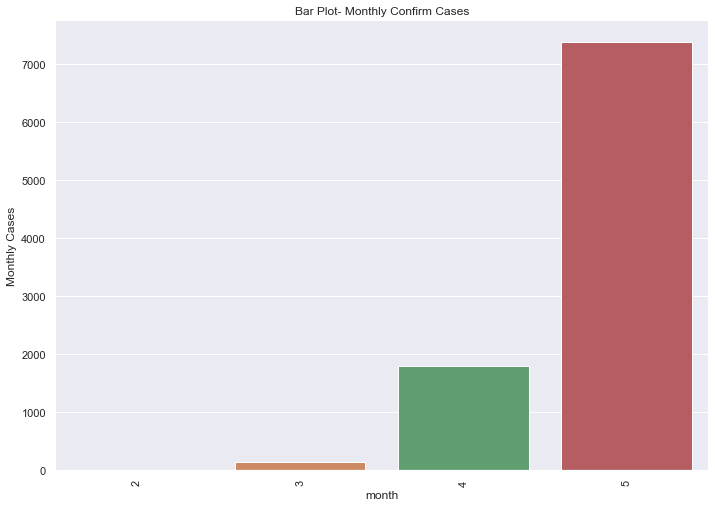

In [353]:
# Monthly confirmed cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='total_daily_cases', data=month_fatality_index_group)
ax.set_title('Bar Plot- Monthly Confirm Cases')
ax.set_ylabel('Monthly Cases')
plt.xticks(rotation = 90)
plt.show()

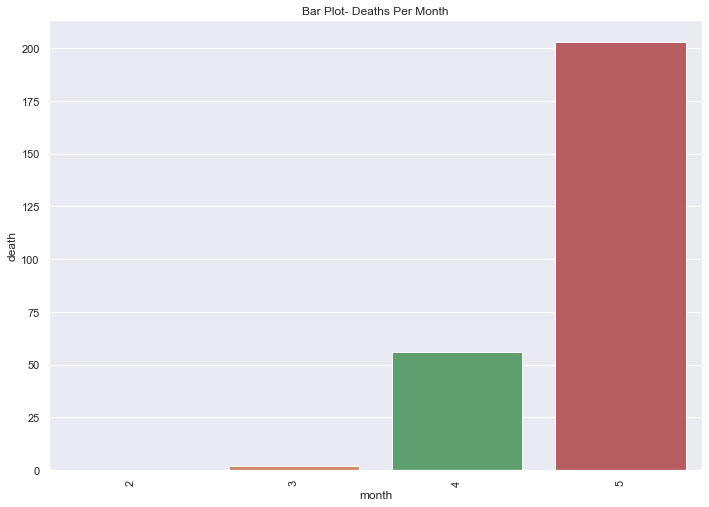

In [354]:
#Monthly Deaths
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='death', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

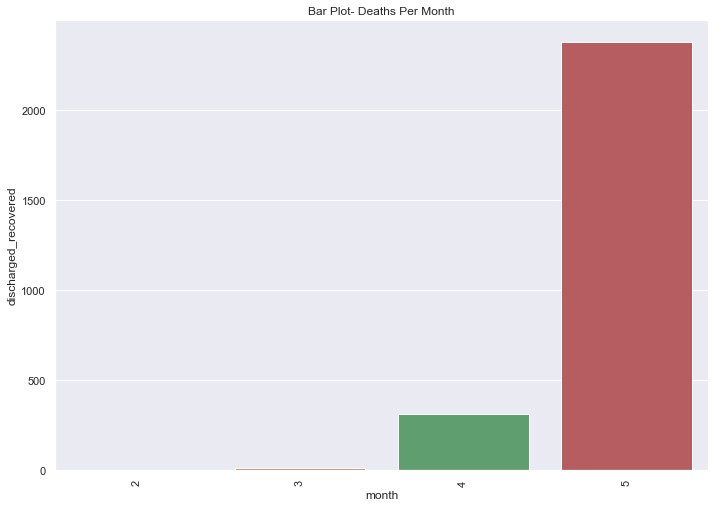

In [355]:
#Number of Recoveries by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='discharged_recovered', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

### Death By States

In [356]:
deathby_state.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"4,377","3,585",745,47
1,Kano,942,709,192,41
2,FCT,564,388,162,14
3,Katsina,358,293,51,14
4,Oyo,275,174,95,6


In [357]:
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].str.replace(',','')
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].astype('int64')


In [358]:
state_stats = deathby_state.groupby('States Affected').agg({'No. Discharged':'max', 'No. of Deaths':'max','No. of Cases (Lab Confirmed)':'max'}).reset_index()
state_stats.head()

,States Affected,No. Discharged,No. of Deaths,No. of Cases (Lab Confirmed)
0,Abia,3,0,10
1,Adamawa,20,4,38
2,Akwa Ibom,14,2,45
3,Anambra,3,1,11
4,Bauchi,208,7,236


In [359]:
deaths_stats = state_stats[['States Affected','No. of Deaths']].sort_values('No. of Deaths', ascending=False)
deaths_stats.head()

,States Affected,No. of Deaths
23,Lagos,47
18,Kano,41
7,Borno,25
32,Sokoto,14
19,Katsina,14


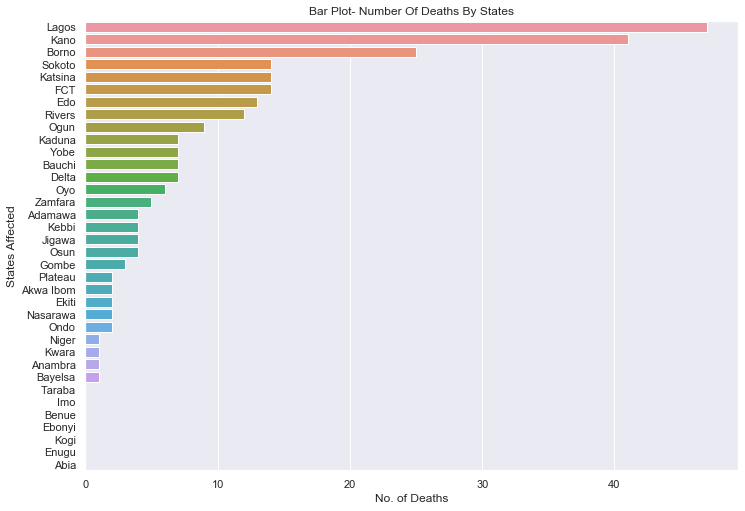

In [360]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Deaths', y='States Affected', data=deaths_stats)
ax.set_title('Bar Plot- Number Of Deaths By States')
#plt.yticks(rotation=90)
plt.show()

### Recoveries/Discharged By States

In [361]:
discharged_stats = state_stats[['No. Discharged', 'States Affected']].sort_values('No. Discharged',ascending=False)
discharged_stats.head()

,No. Discharged,States Affected
23,745,Lagos
4,208,Bauchi
18,192,Kano
13,162,FCT
7,162,Borno


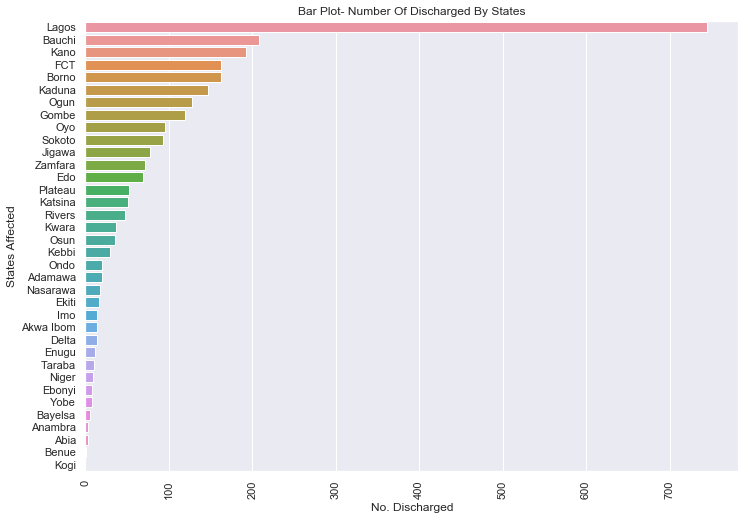

In [362]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. Discharged',y='States Affected', data=discharged_stats)
ax.set_title('Bar Plot- Number Of Discharged By States')
plt.xticks(rotation=90)
plt.show()

In [363]:
confirmed_cases_states = state_stats[['States Affected','No. of Cases (Lab Confirmed)']].sort_values('No. of Cases (Lab Confirmed)', ascending=False)
confirmed_cases_states.head()

,States Affected,No. of Cases (Lab Confirmed)
23,Lagos,4377
18,Kano,942
13,FCT,564
19,Katsina,358
29,Oyo,275


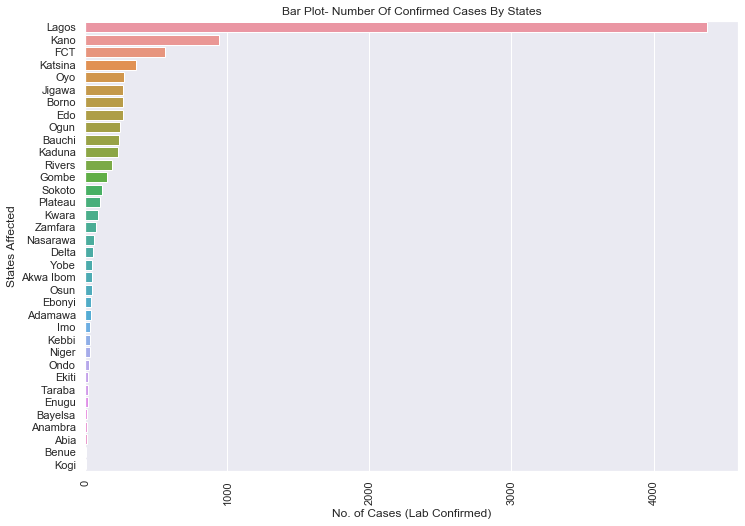

In [364]:
# Confirm cases spread across all states
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Cases (Lab Confirmed)',y='States Affected', data=confirmed_cases_states)
ax.set_title('Bar Plot- Number Of Confirmed Cases By States')
plt.xticks(rotation=90)
plt.show()

### Predicting the Epidemic Situation of Covid19 In Nigeria with Logistic Mathematical Model
My choice of the Logistic Model is simply because it is simple and it conform to the statistical law of Epidemiology

In [365]:
#extract the data we need for building the Logistic Model
model_data = exp_wip_col_clean[['dates', 'death','total_daily_cases','discharged_recovered']]
model_data.head()

,dates,death,total_daily_cases,discharged_recovered
0,2020-02-27 15:40:38,0,1,0
1,2020-02-28 01:00:36,0,0,0
2,2020-02-29 02:26:52,0,0,0
3,2020-03-01 22:44:08,0,0,0
4,2020-03-02 11:53:02,0,0,0


In [366]:
#create a cummulative sum columns
model_data['cum_daily_cases'] = model_data['total_daily_cases'].cumsum()
model_data['cum_daily_deaths'] = model_data['death'].cumsum()
model_data['cum_daily_discharged'] = model_data['discharged_recovered'].cumsum()


In [367]:
cum_data = model_data[['dates', 'cum_daily_cases', 'cum_daily_deaths','cum_daily_discharged']]
cum_data.head()

,dates,cum_daily_cases,cum_daily_deaths,cum_daily_discharged
0,2020-02-27 15:40:38,1,0,0
1,2020-02-28 01:00:36,1,0,0
2,2020-02-29 02:26:52,1,0,0
3,2020-03-01 22:44:08,1,0,0
4,2020-03-02 11:53:02,1,0,0


In [368]:
cum_data.tail()

,dates,cum_daily_cases,cum_daily_deaths,cum_daily_discharged
95,2020-05-25 15:34:33,8075,233,2311
96,2020-05-26 15:30:43,8351,249,2385
97,2020-05-27 15:44:12,8740,254,2501
98,2020-05-28 15:27:18,8922,259,2592
99,2020-05-29 15:46:01,9309,261,2697


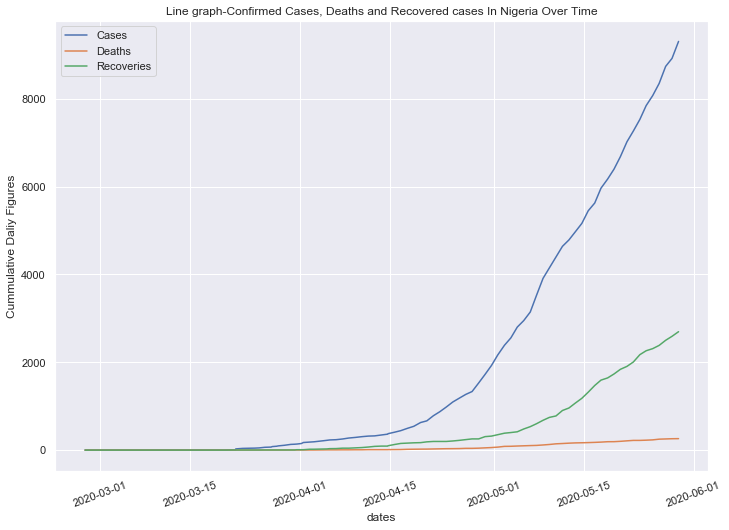

In [369]:
#Line graph of confirm cases over time
ax = sns.lineplot(x='dates', y='cum_daily_cases', data=cum_data, label='Cases')
ax = sns.lineplot(x='dates', y='cum_daily_deaths', data=cum_data,label='Deaths')
ax = sns.lineplot(x='dates', y='cum_daily_discharged', data=cum_data, label='Recoveries')
plt.xticks(rotation=20)
ax.set_title('Line graph-Confirmed Cases, Deaths and Recovered cases In Nigeria Over Time')
ax.set_ylabel('Cummulative Daliy Figures')
ax.legend()
plt.show()




## Build Logistic Model
The logistic model can be simply rendered as $\huge f(x;a,b,c)$ $\huge =$ $\huge \frac{c}{1 + e^-(x-b)/a}$ 

where :
- a = **Infection speed**
- b = **Day with maximum Infections Occured**
- c = **Total Number of people that would be infected at the end of the pandemic**

In [403]:
def logistic_model(x,a,b,c,d):
    return a / (1 + np.exp(-c * (x - d))) + b

# def logistics_noise(a,b,c,d,t):
#     return abs(c/(1+a*np.exp(-b*t))+np.random.normal(0,d))

In [404]:
model_data.head()

,dates,death,total_daily_cases,discharged_recovered,cum_daily_cases,cum_daily_deaths,cum_daily_discharged,time_stamp
0,2020-02-27 15:40:38,0,1,0,1,0,0,0
1,2020-02-28 01:00:36,0,0,0,1,0,0,1
2,2020-02-29 02:26:52,0,0,0,1,0,0,2
3,2020-03-01 22:44:08,0,0,0,1,0,0,3
4,2020-03-02 11:53:02,0,0,0,1,0,0,4


In [405]:
model_data['time_stamp'] = model_data.index
model_data.head()

,dates,death,total_daily_cases,discharged_recovered,cum_daily_cases,cum_daily_deaths,cum_daily_discharged,time_stamp
0,2020-02-27 15:40:38,0,1,0,1,0,0,0
1,2020-02-28 01:00:36,0,0,0,1,0,0,1
2,2020-02-29 02:26:52,0,0,0,1,0,0,2
3,2020-03-01 22:44:08,0,0,0,1,0,0,3
4,2020-03-02 11:53:02,0,0,0,1,0,0,4


In [406]:
# extract x(days) & y(cases) from dataframe
x = list(model_data.iloc[:,7])
y = list(model_data.iloc[:,4])


In [410]:
# randomly initialize a,b,c
p0 = np.random.exponential(size=4)
p0


array([3.34377115e-01, 5.14252468e-04, 1.34379733e+00, 1.30245204e-01])

In [413]:
# set upper and lower bounds a,b,c
bounds = (0,[100000.,1., 100000000.,10000000.])
bounds

(0, [100000.0, 1.0, 100000000.0, 10000000.0])

In [414]:
(a_,b_,c_,d_), cov = curve_fit(logistic_model,x,y,bounds=bounds, p0=p0)

In [416]:
a_,b_,c_,d_

(11313.396431637648,
 5.765593635460243e-09,
 0.10031501876473722,
 85.56979383209665)

In [378]:
#the time step at which the growth is fastest
# t_fastest = np.log(a) / b
# i_fastest = logistic_model(t_fastest, a, b, c)
# i_fastest

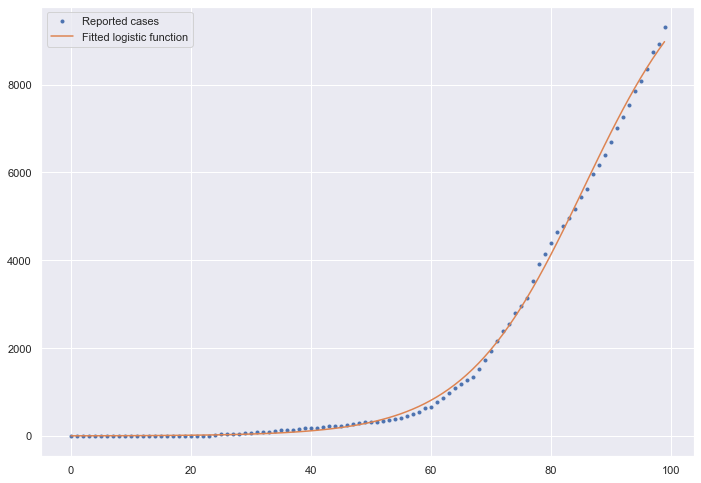

In [417]:
def plot_logistic_fit(confirmed, logistic_params):
    a_, b_, c_, d_ = logistic_params
    x = np.arange(0, len(model_data['time_stamp']))
    plt.plot(x, y, ".", label="Reported cases")
    confirmed_pred = logistic_model(x, a_, b_, c_,d_)
    plt.plot(x, confirmed_pred, label="Fitted logistic function")
    plt.legend()
    plt.show()
    return confirmed_pred
confirmed_pred = plot_logistic_fit(y, (a_, b_, c_,d_))


In [425]:
# def plateau(confirmed, logistic_params, diff=20):
#     a_, b_, c_, d_ = logistic_params 
#     confirmed_now = confirmed[-1]
#     confirmed_then = confirmed[-2]
#     days = 0
#     now = x[-1]
#     while confirmed_now - confirmed_then > diff:
#         days += 1
#         confirmed_then = confirmed_now
#         confirmed_now = logistic_model(
#             now + days,
#             a_,
#             b_,
#             c_,
#             d_,
#         )
#     return days, confirmed_now


In [426]:
# diff = 200
# days, cases = plateau(y, (a_, b_, c_, d_),diff=diff)
# print(f"{days} days until growth is lower than {diff} per day")
# print(f"The total cases will be at {int(cases)}")

### Let see Exponential model
This is being considered because we are still at the early stage of the infection. That is the infection rate in still growing

In [380]:
#the first 60 days of the covid19 cases would be fitted to the exponential model
exp_model = model_data[['time_stamp', 'cum_daily_cases']]

In [381]:
#Apply log transformation to the number of infections
exp_model['log_cases'] = np.log(exp_model.iloc[:,1])

In [382]:
exp_model.head()

,time_stamp,cum_daily_cases,log_cases
0,0,1,0.0
1,1,1,0.0
2,2,1,0.0
3,3,1,0.0
4,4,1,0.0


### Use Statsmodels's Linear Regression

In [385]:
X = exp_model['time_stamp'].to_list()
X = sm.add_constant(X)


In [386]:
y = np.array(exp_model.iloc[:,2])
y

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.79175947, 3.29583687,
       3.66356165, 3.76120012, 3.80666249, 3.91202301, 4.15888308,
       4.2341065 , 4.38202663, 4.47733681, 4.56434819, 4.70048037,
       4.86753445, 4.8978398 , 4.92725369, 5.01063529, 5.15329159,
       5.20948615, 5.24174702, 5.36129217, 5.40717177, 5.44241771,
       5.46806014, 5.53338949, 5.6167711 , 5.66642669, 5.7235851 ,
       5.7651911 , 5.78074352, 5.84064166, 5.89440283, 5.9242558 ,
       6.01126717, 6.09356977, 6.20253552, 6.295266  , 6.44254017,
       6.50128967, 6.6631327 , 6.77308038, 6.88959131, 6.99942247,
       7.07580886, 7.14598447, 7.19593723, 7.33236921, 7.45298233,
       7.56475701, 7.681099  , 7.77779263, 7.84658998, 7.93808

In [387]:
# model for just first 60 days of the virus
modey = sm.OLS(y,X)
result = modey.fit()


In [388]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1676.
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.95e-63
Time:                        15:29:34   Log-Likelihood:                -108.62
No. Observations:                 100   AIC:                             221.2
Df Residuals:                      98   BIC:                             226.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1332      0.144      0.926      0.3

In [295]:
np.exp(0.1332), np.exp(0.1027)

(2.5178364974120413, 1.160556927713336)

In [390]:
# Linear regression actual function
#y = np.exp(0.1332) * np.exp(0.1056) **t
def linear_pred(t):
    return np.exp(0.9234) * (np.exp(0.1027) ** t)

In [391]:
exp_model['predictions'] = exp_model['time_stamp'].apply(linear_pred)
exp_model.head()


,time_stamp,cum_daily_cases,log_cases,predictions
0,0,1,0.0,2.517836
1,1,1,0.0,2.790163
2,2,1,0.0,3.091944
3,3,1,0.0,3.426365
4,4,1,0.0,3.796957


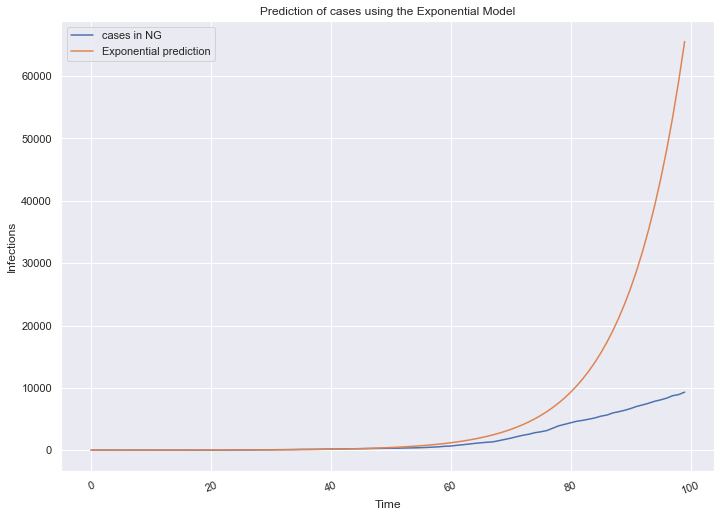

In [393]:
ax = sns.lineplot(x='time_stamp', y='cum_daily_cases', data=exp_model, label='cases in NG')
ax = sns.lineplot(x='time_stamp', y='predictions', data=exp_model,label='Exponential prediction')
plt.xticks(rotation=20)
ax.set_title('Prediction of cases using the Exponential Model')
ax.set_ylabel('Infections')
ax.set_xlabel('Time')
plt.legend()
plt.show()


#### Predict Infection cases One week After the current last day

In [394]:
cases_in_one_week = len(exp_model['time_stamp']) + 7
cases_in_one_week


107

In [265]:
t103 = np.exp(0.0404) *  np.exp(0.1056)**cases_in_one_week
t103

55116.25716558372